# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


Step 1, import the things we probably always want

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

These ones are not for always, but I like this plotting style for this workbook

In [2]:
import matplotlib
matplotlib.style.use('ggplot')

Before we can see if a straight line model even applies, we have to have a look at it.

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [3]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

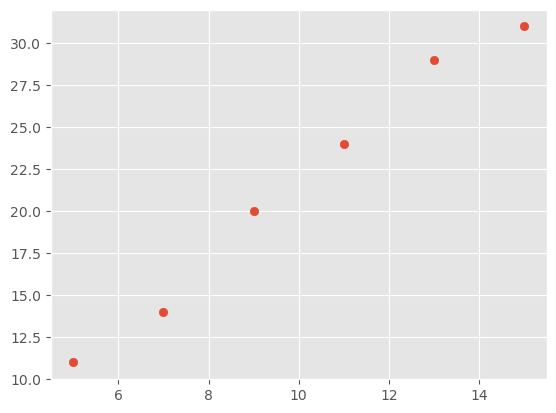

In [4]:
plt.scatter(X,y)
plt.show()

not a perfect linear, but pretty linear.

We can check the correlation coefficient 

In [5]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

Next thing we need to do is if we want to use linear regression where we have Y are outputs and X are inputs, we need to ensure that X is A2 dimensional vector.

## Data Structure: let's look at X and y in more detail

![array](array.png)
![array](img/array.png)

In [6]:
# eg
gest=np.array([[ [1,2,3],  ]])

In [7]:
# eg
gest.shape

(1, 1, 3)

In [8]:
y

array([11, 14, 20, 24, 29, 31])

In [9]:
pd.DataFrame(y)

,0
0,11
1,14
2,20
3,24
4,29
5,31


In [10]:
y.shape

(6,)

In [11]:
y

array([11, 14, 20, 24, 29, 31])

In [12]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [13]:
X.shape

(6,)

In [14]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [15]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [16]:
X = X.reshape(-1,1)

In [17]:
X.shape

(6, 1)

becomes 2d

In [18]:
X.ndim

2

2d array. Good. Let's look at it

In [19]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [22]:
model = LinearRegression()

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

X is 2d vector, y is 1d vector

In [23]:
model.fit(X,y)

LinearRegression()

It returns me just this linear regression model, but nothing has been done with it yet.
7 minutes 27 seconds
It's just a linear model.
7 minutes 29 seconds
We can query it in the next section and we can also kind of query, you know, what are the coefficients of the model, the W zero and the West one.
7 minutes 37 seconds
But we can also query what's the performance of the error on the model.
7 minutes 43 seconds


## Section 4 Inferences

In [24]:
model.coef_

array([2.12857143])

In [25]:
model.intercept_

0.2142857142857153

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model




So what I can do is I can actually build a module model manually.

In [26]:
w0 = model.intercept_
w1 = model.coef_[0]

In [27]:
w1,X.shape

(2.1285714285714286, (6, 1))

![npdot](npdot.jpg)

In [28]:
#w0 + 
np.dot(w1,X)
#.reshape(1,-1) 

array([[10.64285714],
       [14.9       ],
       [19.15714286],
       [23.41428571],
       [27.67142857],
       [31.92857143]])

In [29]:
w0

0.2142857142857153

In [30]:
np.dot(w1,X).reshape(1,-1).shape

(1, 6)

In [31]:
np.dot(w1,X).shape

(6, 1)

In [32]:
(w0 + np.dot(w1,X).reshape(1,-1)).shape

(1, 6)

In [33]:
predictions

NameError: name 'predictions' is not defined

In [246]:
predictions = w0 + np.dot(w1,X).reshape(1,-1) 

In [ ]:
predictions

Using the built in .predict

In [179]:
pred = model.predict(X)

In [ ]:
pred

So my predictions and as you can see here, the predictions by building the model myself versus the predictions by using SK learns built in predict model are exactly the same.

9 minutes 9 seconds
If you look at these two, those two numbers, I can actually do it nicely here with Python where I can just query, are these predictions from the model equal to the model I built?
9 minutes 19 seconds
Are they the same?
9 minutes 20 seconds
And you can see they're all true.

In [ ]:
pred == predictions

They're the same.

The next thing then is evaluating, as I said, the error and the quality of the model.

## Section 5 Evaluation

In [182]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import root_mean_squared_error as rms

I had to comment out rms on my ATU laptop as sklearn is not up to date - it might work for you do so try uncommenting

root_mean_squared_error

sklearn.metrics.root_mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')

Root mean squared error regression loss.

from sklearn.metrics import root_mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
root_mean_squared_error(y_true, y_pred)
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
root_mean_squared_error(y_true, y_pred)

In [ ]:
mse(y,pred)

In [ ]:
r2(y,pred)

Very close to 1!

So again, this shows that my model, my predictions are very close to the actual values of Y.

In [ ]:
rms(y,pred)

In [186]:
rmse = np.sqrt(mse(y,pred))

In [ ]:
rmse # same as rms above

But the other thing you can do is you can actually visualise the model and we can see here versus the data I provided and the model, they're a very close match and you can see where the sum of the errors are in the predictions.

And that's accounting for it not being a perfect 1.

In [ ]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [ ]:
model.score(X,y)

You just do model dot score and you can see here in 9864, which just shows you that the under the hood scoring the model in SK Learn is using the R-squared metric.
11 minutes 13 seconds
You can change that metric, I think in this parameter setting you can change it, but by default the R-squared metric.
11 minutes 18 seconds


Agrees with the r2 from above

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

https://numpy.org/doc/stable/reference/generated/numpy.dot.html
https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
https://scikit-learn.org/stable/modules/linear_model.html
https://www.geeksforgeeks.org/split-pandas-dataframe-by-rows/
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

In [ ]:
# i pick weight, then try others

X = dfcars['wt']  # Predictor variables
y = dfcars['mpg']  # Dependent variable

plt.scatter(X,y)
plt.show()

In [ ]:
np.corrcoef(X, y)

In [ ]:
dfcars['wt'].corr(dfcars['mpg']) 

In [ ]:
X

In [ ]:
y

In [ ]:
X = dfcars['wt'].to_numpy().reshape(-1, 1) # reshape because of single feature
y = dfcars['mpg'].to_numpy()

X.shape, y.shape

In [ ]:
reg = LinearRegression()
reg.fit(X, y)

In [ ]:
reg.coef_, reg.intercept_

In [199]:
from sklearn.model_selection import train_test_split

In [ ]:
dfcars.shape, .2 *32

In [201]:
# split data X
Xy_train, Xy_test = train_test_split(dfcars, train_size=0.8, random_state=42)

In [ ]:
X_train = Xy_train['wt'].to_numpy().reshape(-1,1)
y_train = Xy_train['mpg'].to_numpy()

X_test = Xy_test['wt'].to_numpy().reshape(-1,1)
y_test = Xy_test['mpg'].to_numpy()

X_train.shape, y_train.shape
#type(X_train)

In [203]:
reg = LinearRegression()
reg.fit(X=X_train, y=y_train)
y_pred = reg.predict(X=X_test)

In [ ]:
plt.scatter(X_test, y_test, color='k')
plt.scatter(X_test, y_pred, color='b', linewidths=3)
plt.show()

In [ ]:
# evaluate 
print("Coefficients: \n", reg.coef_)

In [ ]:
print("Mean squared error: %.2f" % mse(y_test, y_pred))

In [ ]:
r2(y_test,y_pred)

### look at data structure

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

    coef_array of shape (n_features, ) or (n_targets, n_features)

        Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

If y is 1-dimensional (common for target variables), we reshape it using 
y.values.reshape(-1, 1) to ensure it's in 2D format as required by some machine learning models.

In [ ]:
print(f"Initial X.shape: {X.shape}, X.ndim: {X.ndim}")

In [ ]:
y

In [ ]:
print(f"Initial y.shape: {y.shape}, y.ndim: {y.ndim}")

pick weight bc of highest correlation coefficient among all variables

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

In [211]:
#your code here
#define  predictor and response for set

# Split the data into training and test sets


In [212]:
#your code here
# create linear regression object with sklearn


In [213]:
#your code here
# train the model and make predictions


In [214]:
# Predict mpg for the test set


In [215]:
#your code here
#print out coefficients

# Evaluate the model



In [216]:
# your code here
# Plot outputs

# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

In [ ]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation



but I definitely know age doesn't go from minus .1 to plus .1.
15 minutes 26 seconds
And I'm guess that as well, well sex as well doesn't go from this value to that value.
15 minutes 31 seconds
So what is going on, and you can see it here, there's some, there seems to be discrete values, point O 5 or negative point O 4.
15 minutes 39 seconds
So what happens is that in order to make all the data correspond to the same sort of ranges, often what people do is a very first step with a data set is they do something called normalising the data set.
15 minutes 51 seconds
And normalising the data set is scaling all the values so that they're all within similar margins.
15 minutes 58 seconds
I'll talk more about why they do this, but it's basically to ensure that one variable doesn't have a really large influence.
16 minutes 4 seconds
That if all the values here were in the range of .2 to -.2, we had a value that was between 0 and 100.
16 minutes 10 seconds
Like that's, you know, multiple orders of magnitude bigger than all the others.
16 minutes 15 seconds
And it's going to have a really skewed effect.
16 minutes 16 seconds
So it's best to keep all your samples, what we're talking about, again, within certain ranges in order that one of these features.
16 minutes 23 seconds
Imagine you had a really, really tiny feature that was like milli or like micro 10 to the -6 here, even though it might contain really significant information, because it's so, so tiny, the numbers would be so, so tiny.
16 minutes 36 seconds
The numbers would be lost in the algorithm.
16 minutes 38 seconds
The algorithm wouldn't just detect those tiny numbers.
16 minutes 40 seconds
So again, it's good to have everything normalised.
16 minutes 44 seconds
Put everything in the data's frame, visualise it.
16 minutes 46 seconds
It's all in a similar range.
16 minutes 49 seconds
Or I just talked about the normalised.
16 minutes 50 seconds
All of them mean a zero and a standard deviation of one, a very common step.
16 minutes 55 seconds
We'll talk about again the E.
16 minutes 56 seconds
The best example there is what age or sex, which has got two options when either you go with plus 1 -, 1 or 011 or whatever.
17 minutes 4 seconds
So all of these numbers were changed.
17 minutes 6 seconds
You know, these aren't the real numbers of S1 or S2.
17 minutes 9 seconds
They're all changed because of the normalisation.

In [219]:
X = data 
y = diabetes.target

In [220]:
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

In [ ]:
r_squared = lr.score(X,y)
r_squared

Let's do a slightly different r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

In [ ]:
lr.coef_

And what I can do, which is interesting, is look at the actual coefficients.
17 minutes 56 seconds
So if I see here and I'll see them in a graphical format a bit more, some of them are quite small and some of them are quite large.
18 minutes 3 seconds
And what that means, the intercept isn't survivable.
18 minutes 6 seconds
But what that means is that see this one here, which relates to age.
18 minutes 10 seconds
That very first column is the age column.
18 minutes 13 seconds
Because of such a tiny coefficient, it's scaled by only a tiny amount.
18 minutes 16 seconds
It probably means that age isn't a very good predictor of the output of this measure of the progression of the disease, and some of these are better predictions.
18 minutes 26 seconds
So sex would be a marginally better predictor.
18 minutes 29 seconds
But this S1, whatever this blood work is, has got a very high influence on the output these coefficients show on.
18 minutes 36 seconds
Similarly, the S5S3 doesn't seem to have so much of an influence.
18 minutes 41 seconds
Some of the coefficients are very large.
18 minutes 43 seconds
Looks like age doesn't contribute as much.
18 minutes 45 seconds
Sometimes the large coefficients are problematic.
18 minutes 47 seconds
We'll talk about that again.
18 minutes 49 seconds
It's coming up in the next few weeks.
18 minutes 50 seconds
Often removing these insignificant ones makes the model smaller and can actually improve the performance of the module.
18 minutes 58 seconds
But we don't have, at this point in time, enough knowledge to figure it out.
19 minutes 1 second
It would involve stripping some of these things out of the model and using various combinations.
19 minutes 5 seconds
You know, maybe only these three features by itself might give you a better model.
19 minutes 9 seconds
So this is the kind of work you do as a machine learning in the real world as you'd be looking at which of these features together in the model really give the best predictive performance of the outbush.
19 minutes 21 seconds
You know, it's possible to get a better model without age.
19 minutes 24 seconds
S3S4 and S6 strip all that out.
19 minutes 27 seconds
You could actually get better performance and it's something you can have a look at yourselves.
19 minutes 30 seconds
With pandas, you should have enough skill to strip out different columns, strip out these columns, refeed it all back into the model, and refish the model.
19 minutes 40 seconds
And again, you can look at your outputs to see if you can beat this score, your R-squared score of .5 O at the moment.

In [ ]:
lr.intercept_

In [ ]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6